<a href="https://colab.research.google.com/github/Sushobhan55/Algo/blob/master/Algorithmic%20Trading1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving TSLA.csv to TSLA (3).csv


In [ ]:
TSLA=pd.read_csv('TSLA.csv')
TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2516,2020-06-26,994.780029,995.000000,954.869995,959.739990,959.739990,8854900
2517,2020-06-29,969.010010,1010.000000,948.520020,1009.349976,1009.349976,9026400
2518,2020-06-30,1006.500000,1087.689941,1003.729980,1079.810059,1079.810059,16918500
2519,2020-07-01,1083.000000,1135.329956,1080.500000,1119.630005,1119.630005,13326900


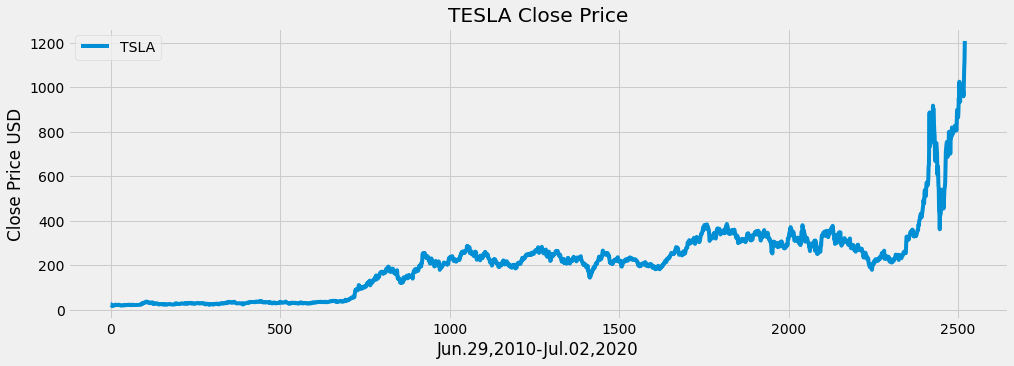

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(TSLA['Close'],label='TSLA')
plt.title('TESLA Close Price')
plt.xlabel('Jun.29,2010-Jul.02,2020')
plt.ylabel('Close Price USD')
plt.legend(loc='upper left')
plt.show()

In [ ]:
SMA20=pd.DataFrame()
SMA20['Close']=TSLA['Close'].rolling(window=20).mean()
SMA20

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2516,955.438504
2517,961.001004
2518,970.913507
2519,982.747006


In [ ]:
SMA100=pd.DataFrame()
SMA100['Close']=TSLA['Close'].rolling(window=100).mean()
SMA100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2516,748.175101
2517,750.921600
2518,754.230101
2519,757.945701


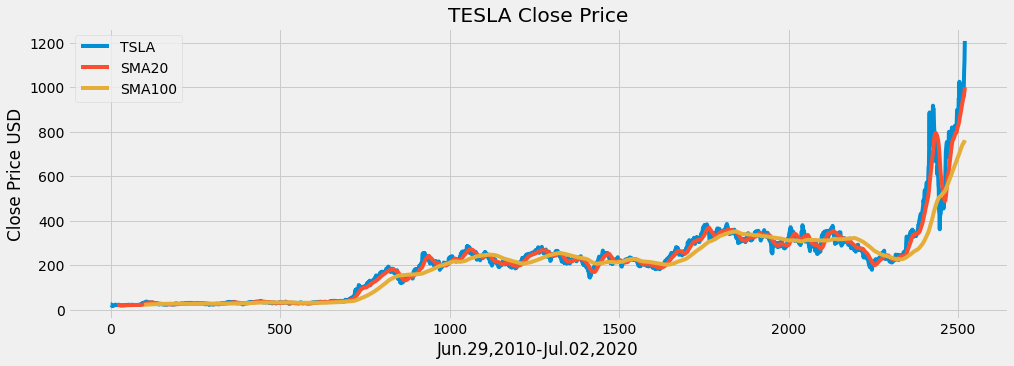

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(TSLA['Close'],label='TSLA')
plt.plot(SMA20['Close'],label='SMA20')
plt.plot(SMA100['Close'],label='SMA100')
plt.title('TESLA Close Price')
plt.xlabel('Jun.29,2010-Jul.02,2020')
plt.ylabel('Close Price USD')
plt.legend(loc='upper left')
plt.show()

In [ ]:
data=pd.DataFrame()
data['TSLA']=TSLA['Close']
data['SMA20']=SMA20['Close']
data['SMA100']=SMA100['Close']
data

,TSLA,SMA20,SMA100
0,23.889999,NaN,NaN
1,23.830000,NaN,NaN
2,21.959999,NaN,NaN
3,19.200001,NaN,NaN
4,16.110001,NaN,NaN
...,...,...,...
2516,959.739990,955.438504,748.175101
2517,1009.349976,961.001004,750.921600
2518,1079.810059,970.913507,754.230101
2519,1119.630005,982.747006,757.945701


In [ ]:
def buy_sell(data):
  sigPriceBuy=[]
  sigPriceSell=[]
  flag=-1

  for i in range(len(data)):
    if data['SMA20'][i]>data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['TSLA'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA20'][i]<data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['TSLA'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
        
  return (sigPriceBuy, sigPriceSell)
    

In [ ]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]


In [ ]:
data

,TSLA,SMA20,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,23.889999,NaN,NaN,NaN,NaN
1,23.830000,NaN,NaN,NaN,NaN
2,21.959999,NaN,NaN,NaN,NaN
3,19.200001,NaN,NaN,NaN,NaN
4,16.110001,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2516,959.739990,955.438504,748.175101,NaN,NaN
2517,1009.349976,961.001004,750.921600,NaN,NaN
2518,1079.810059,970.913507,754.230101,NaN,NaN
2519,1119.630005,982.747006,757.945701,NaN,NaN


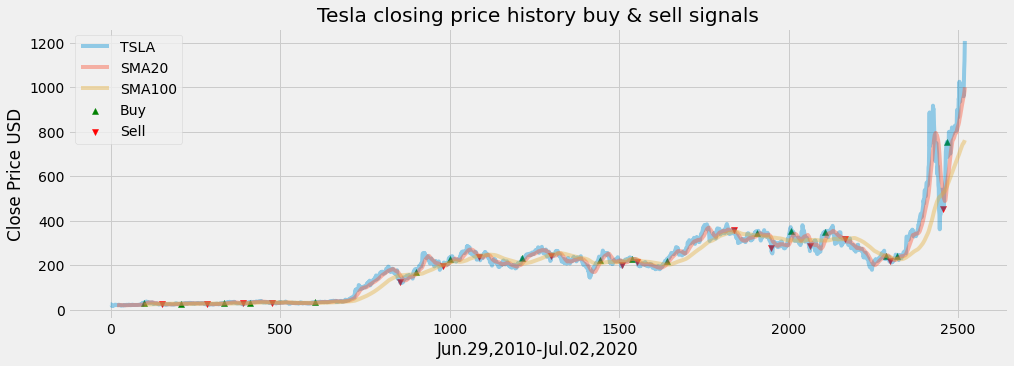

In [ ]:
#visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(15,5))
plt.plot(data['TSLA'],label='TSLA', alpha = 0.4)
plt.plot(data['SMA20'],label='SMA20', alpha = 0.4)
plt.plot(data['SMA100'],label='SMA100', alpha = 0.4)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Tesla closing price history buy & sell signals')
plt.xlabel('Jun.29,2010-Jul.02,2020')
plt.ylabel('Close Price USD')
plt.legend(loc='upper left')
plt.show()